In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from core.utils import solve_path, lst_files

sns.set()

In [2]:
folder_modelagem = solve_path('dados_modelagem', 'data')

In [3]:
csvs = lst_files(folder_modelagem, 'csv')

In [4]:
csvs

['/home/h-pgy/Desktop/Projetos/mulheres_bolsonaro/data/dados_modelagem/var_exogenas_modelo.csv',
 '/home/h-pgy/Desktop/Projetos/mulheres_bolsonaro/data/dados_modelagem/votos_por_zona.csv',
 '/home/h-pgy/Desktop/Projetos/mulheres_bolsonaro/data/dados_modelagem/dados_modelagem_final.csv']

In [5]:
fpath_exogenas = solve_path('var_exogenas_modelo.csv', folder_modelagem)
fpath_endogenas = solve_path('votos_por_zona.csv', folder_modelagem)

In [6]:
exog = pd.read_csv(fpath_exogenas, sep=';')

In [7]:
exog.head()

,nr_zona,prop_mulheres,prop_superior_completo,prop_sem_fundametal,prop_mais_60_anos,prop_menos_25_anos
0,1,0.521366,0.322225,0.154731,0.285246,0.071691
1,2,0.544536,0.432805,0.087887,0.324000,0.076005
2,3,0.501387,0.153666,0.229940,0.264833,0.102532
3,4,0.536943,0.257316,0.151490,0.302248,0.095024
4,5,0.546311,0.524865,0.057162,0.364926,0.059899


In [8]:
endog = pd.read_csv(fpath_endogenas, sep=';')

In [9]:
endog.head()

,nr_zona,qt_aptos,qt_comparecimento,qt_abstencoes,jair_bolsonaro,branco,lula,nulo
0,1,152763,112348,40415,38733,1763,68072,3780
1,2,196996,151435,45561,63525,2774,79314,5822
2,3,80219,57700,22519,25295,1020,29166,2219
3,4,165153,127249,37904,69747,2475,49445,5582
4,5,126805,95235,31570,48121,2007,41347,3760


In [10]:
endog['prop_abstencao'] = endog['qt_abstencoes']/endog['qt_aptos']

In [11]:
votos = ['jair_bolsonaro', 'branco', 'lula', 'nulo']

Checando se o comparecimento representa a quantidade total de votos na Zona,
incluindo nulos e brancos

In [12]:
(endog[votos].sum(axis=1)==endog['qt_comparecimento']).all()

True

In [13]:
endog['prop_votos_bolsonaro'] = endog['jair_bolsonaro']/endog['qt_comparecimento']

In [14]:
endog = endog[['nr_zona', 'prop_votos_bolsonaro', 'prop_abstencao']].copy()

In [15]:
endog.head()

,nr_zona,prop_votos_bolsonaro,prop_abstencao
0,1,0.344759,0.264560
1,2,0.419487,0.231279
2,3,0.438388,0.280719
3,4,0.548114,0.229508
4,5,0.505287,0.248965


In [16]:
df_final = pd.merge(endog, exog, on='nr_zona', how='inner')

In [17]:
len(df_final)==len(endog)==len(exog)==58

True

In [18]:
df_final.head()

,nr_zona,prop_votos_bolsonaro,prop_abstencao,prop_mulheres,prop_superior_completo,prop_sem_fundametal,prop_mais_60_anos,prop_menos_25_anos
0,1,0.344759,0.264560,0.521366,0.322225,0.154731,0.285246,0.071691
1,2,0.419487,0.231279,0.544536,0.432805,0.087887,0.324000,0.076005
2,3,0.438388,0.280719,0.501387,0.153666,0.229940,0.264833,0.102532
3,4,0.548114,0.229508,0.536943,0.257316,0.151490,0.302248,0.095024
4,5,0.505287,0.248965,0.546311,0.524865,0.057162,0.364926,0.059899


Ver correlações nas exogenas

In [19]:
exogs = [
    'prop_abstencao',
         'prop_mulheres', 	
         'prop_superior_completo', 	
         'prop_sem_fundametal', 	
         'prop_mais_60_anos', 	
         'prop_menos_25_anos'
        ]

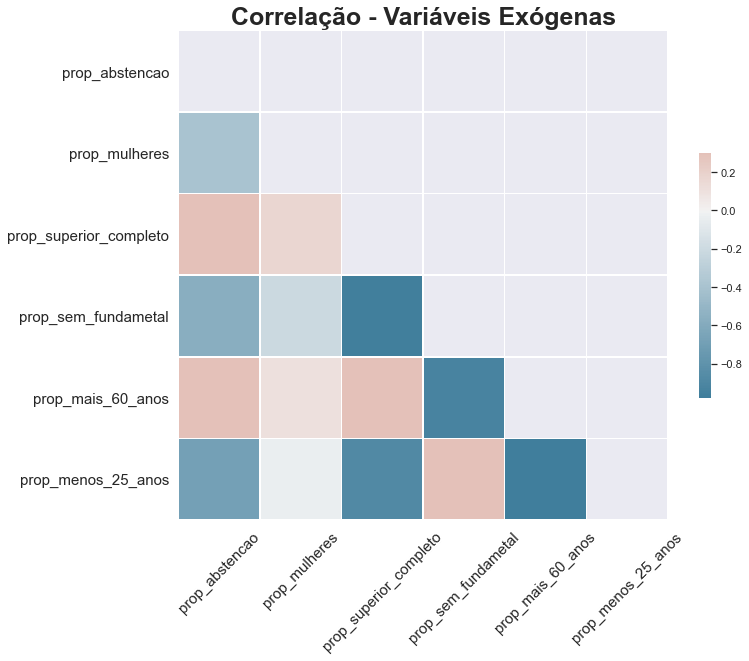

In [20]:
corr = df_final[exogs].corr()


mask=np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlação - Variáveis Exógenas', size=25,fontweight="bold")
corr_plot.tick_params(labelsize=15)
plt.xticks(rotation = 45) 
fig.savefig('matriz_correlacao_exogs.png', bbox_inches='tight')

In [21]:
df_final.keys()

Index(['nr_zona', 'prop_votos_bolsonaro', 'prop_abstencao', 'prop_mulheres',
       'prop_superior_completo', 'prop_sem_fundametal', 'prop_mais_60_anos',
       'prop_menos_25_anos'],
      dtype='object')

In [22]:
df_final = df_final.drop(['prop_sem_fundametal', 'prop_menos_25_anos'], axis=1)

In [23]:
exogs.remove('prop_sem_fundametal')
exogs.remove('prop_menos_25_anos')

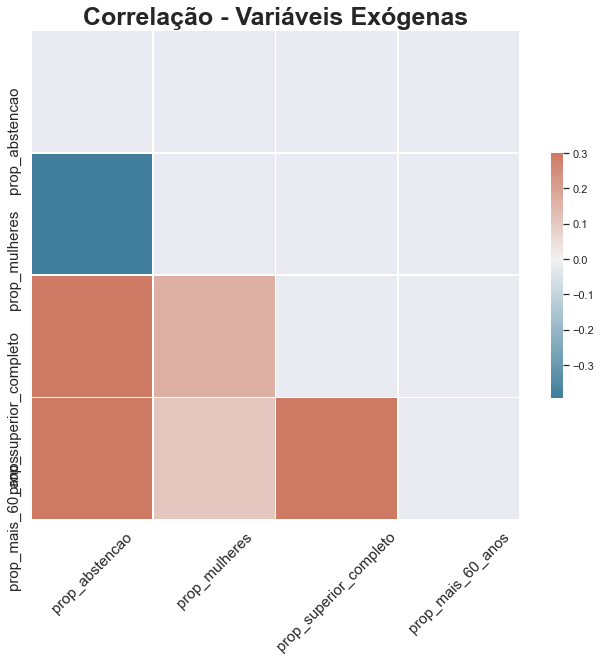

In [24]:
corr = df_final[exogs].corr()


mask=np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlação - Variáveis Exógenas', size=25,fontweight="bold")
corr_plot.tick_params(labelsize=15)
plt.xticks(rotation = 45) 
fig.savefig('matriz_correlacao_exogs_2.png', bbox_inches='tight')

In [25]:
fpath_dados_final = solve_path('dados_modelagem_final.csv', folder_modelagem)

In [26]:
df_final.to_csv(fpath_dados_final, index=False, sep=';')

In [27]:
df_final.head()

,nr_zona,prop_votos_bolsonaro,prop_abstencao,prop_mulheres,prop_superior_completo,prop_mais_60_anos
0,1,0.344759,0.264560,0.521366,0.322225,0.285246
1,2,0.419487,0.231279,0.544536,0.432805,0.324000
2,3,0.438388,0.280719,0.501387,0.153666,0.264833
3,4,0.548114,0.229508,0.536943,0.257316,0.302248
4,5,0.505287,0.248965,0.546311,0.524865,0.364926


In [28]:
import statsmodels.api as sm

In [29]:
zonas = df_final['nr_zona']

In [30]:
y = df_final['prop_votos_bolsonaro']
X = df_final.drop(['nr_zona', 'prop_votos_bolsonaro'], axis=1)

In [31]:
X['const']=1

In [32]:
model = sm.OLS(y,X)

In [33]:
results = model.fit()

In [34]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     prop_votos_bolsonaro   R-squared:                       0.736
Model:                              OLS   Adj. R-squared:                  0.717
Method:                   Least Squares   F-statistic:                     37.02
Date:                  Tue, 29 Nov 2022   Prob (F-statistic):           9.26e-15
Time:                          21:16:12   Log-Likelihood:                 115.73
No. Observations:                    58   AIC:                            -221.5
Df Residuals:                        53   BIC:                            -211.1
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
prop_abs

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
cols = df_final.columns

In [38]:
df_scaled = scaler.fit_transform(df_final)

In [39]:
df_scaled = pd.DataFrame(df_scaled, columns=cols)

In [40]:
y = df_scaled['prop_votos_bolsonaro']
X = df_scaled.drop(['nr_zona', 'prop_votos_bolsonaro'], axis=1)

In [41]:
X['const']=1

In [42]:
model2 = sm.OLS(y,X)

In [43]:
results2 = model2.fit()

In [44]:
print(results2.summary())

                             OLS Regression Results                             
Dep. Variable:     prop_votos_bolsonaro   R-squared:                       0.736
Model:                              OLS   Adj. R-squared:                  0.717
Method:                   Least Squares   F-statistic:                     37.02
Date:                  Tue, 29 Nov 2022   Prob (F-statistic):           9.26e-15
Time:                          21:16:13   Log-Likelihood:                -43.631
No. Observations:                    58   AIC:                             97.26
Df Residuals:                        53   BIC:                             107.6
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
prop_abs